# Latent Space Recovery

#### Cummulative effect

- The quality of inferred lambda as a function of number of variables
- Dataframe fields: (sim_rep, num_vars, direction)

#### Simulation Procedure

- Pre-determine the order of variable inclusion
- Determine a matrix of a given noise level structure
- Paramters: start index, stop index

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
print(logging.__file__)
print(mpl.__file__)

/home/users/jjzhu/.pyenv/versions/3.6.1/lib/python3.6/logging/__init__.py
/home/users/jjzhu/.ve/aloe/lib/python3.6/site-packages/matplotlib/__init__.py


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cm
from scipy.stats import spearmanr
logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

from plot_utils import plot_ground_truth_heatmap, plot_spike_grps
from sim_utils import load_regime_results, get_sim_params
from sim_utils import generate_regime_info, get_regime_info
from plot_utils import plot_main_sim_strict_plot

In [3]:
sim_id = "main_sim_strict_1"
params = get_sim_params(sim_id)
logger.info(params)
df_regime = get_regime_info(sim_id)
df_result = load_regime_results(sim_id)
df_result = pd.merge(df_result, df_regime, how="left", on="Regime")
display(df_result.tail())
display(df_regime)

[feat_viz INFO] {'seed': 0, 'n_samps': 1500, 'n_samps_list': [500, 1000, 1500, 2000, 5000], 'n_trials': 50, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 4, 'rel_noise_list': [0.5]}, 'target_vars': 80, 'method': None, 'graph_k': 10, 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_strict_1', 'n_var_list': [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76]}
[feat_viz INFO] sim. dir.: /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] Loaded all data: (10000, 6)


,n_init,n_cand,corr,method,seed,Regime,n_samps,n_trials
9995,4.0,60.0,0.938169,graph,49,4,5000,50
9996,4.0,64.0,0.934965,graph,49,4,5000,50
9997,4.0,68.0,0.933570,graph,49,4,5000,50
9998,4.0,72.0,0.932613,graph,49,4,5000,50
9999,4.0,76.0,0.930703,graph,49,4,5000,50


,n_samps,n_trials,Regime
0,500,50,0
1,1000,50,1
2,1500,50,2
3,2000,50,3
4,5000,50,4


/home/users/jjzhu/.ve/aloe/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


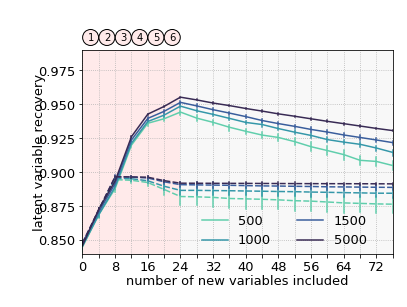

In [5]:
tot_height = 5
fig1_width = 7
fig2_width = 5
fig12_wspace = 0.05
sub_row_height = 5
hspace = 0.3
shared_params = {
    "main_fontsize": 13,
    "fig_nnull": {
        "wspace": 0.2,
        "hspace": hspace,
        "width_ratios": [0.1, 10],
        "height_ratios": [1, sub_row_height, sub_row_height, 0.5], 
        "size": (fig1_width, tot_height),
    },
    "fig_plot": {
        "wspace": 0.2,
        "hspace": hspace*0.8,
        "height_ratios":  [1, 2*sub_row_height, 0.5], 
        "width_ratios": [0.5, 8],
        "size": (6.5, 5),
    }
} 
plot_main_sim_strict_plot(df_result, params, shared_params, 
                          bottom_legend=True, hide_ann=False)

# Save figures to file

/home/users/jjzhu/.ve/aloe/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
[feat_viz INFO] Saved figure to: /share/PI/sabatti/feat_viz/main_figs/main_sim_strict.pdf


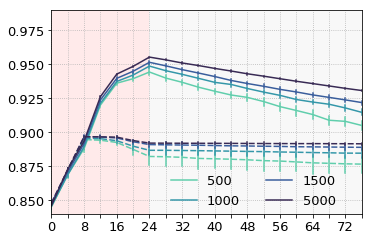

In [6]:
FDIR = "/share/PI/sabatti/feat_viz/main_figs"
fn = os.path.join(FDIR, "main_sim_strict.pdf")
plot_main_sim_strict_plot(df_result, params, shared_params, 
                          bottom_legend=True, hide_ann=True,
                          fn=fn)

[feat_viz INFO] Saved figure to: /share/PI/sabatti/feat_viz/main_figs/main_sim_fig_templates.pdf


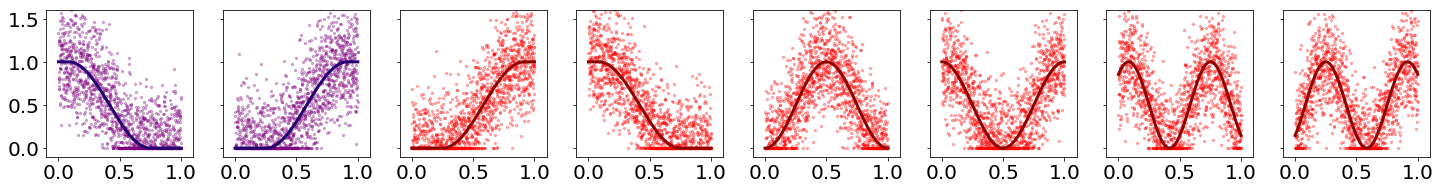

In [7]:
from plot_utils import plot_spikes_examples
# params["y_param"]['rel_noise_list'] = [5e-2]
xspikes = params["x_param"]['spike_grp']
yspikes = params["y_param"]['spike_grp']
x_nlist = [params["x_param"]['rel_noise_list'][1]] + [0]
y_nlist = [params["x_param"]['rel_noise_list'][1]] + [0]
n_plts = len(xspikes) + len(yspikes)
fig, axes = plt.subplots(1, n_plts, figsize=(n_plts*3.1, 2.7), sharey=True)
for i_spike in range(n_plts):
    ax = axes[i_spike]
    if i_spike < len(xspikes): # predominant variables
        spike = xspikes[i_spike]
        scat_col = "purple"
        curve_col = "#23006F"
    else:
        spike = yspikes[i_spike-len(xspikes)]
        scat_col = "red"
        curve_col = "#8E0202"
    plot_spikes_examples(ax, spike, x_nlist, 
                         n_samps=params["n_samps"], alpha=0.3, size=5,
                         scat_col=scat_col, curve_col=curve_col)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.6)
fn = os.path.join(FDIR, "main_sim_fig_templates.pdf")
if fn:
    plt.savefig(fn, bbox_inches='tight') 
    logger.info("Saved figure to: {}".format(fn))
plt.show()